# Dynamic Topic Modeling on the Sunstein corpus

In this notebook, we will be using Dynamic Topic Modeling with BERTopic to visualize how topics in Sunstein's papers have evolved over time. These topics will be visualized and thoroughly explored. 

## Dynamic Topic Models
Dynamic topic models can be used to analyze the evolution of topics of a collection of documents over time. 

<br>

<img src="https://raw.githubusercontent.com/MaartenGr/BERTopic/master/images/logo.png" width="40%">

# Enabling the GPU

First, you'll need to enable GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

[Reference](https://colab.research.google.com/notebooks/gpu.ipynb)

# Installing BERTopic

We start by installing BERTopic from PyPi:

## Restart the Notebook
After installing BERTopic, some packages that were already loaded were updated and in order to correctly use them, we should now restart the notebook.

From the Menu:

Runtime → Restart Runtime

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **Data**


In [13]:
import datetime
import os
import re
import nltk

from nltk.corpus import stopwords
from tqdm import tqdm

PATH = 'data/sunstein/processed/'

timestamps = []
texts = []

for file in os.listdir(PATH):
    if file.endswith('cermine.txt'):
        new_file = PATH + file.replace('cermine', 'final')
        if os.path.exists(new_file):
            file = new_file
        else:
            print(file)
            file = PATH + file
        year = file.split('processed/')[1][:4]
        data = open(file).read()
        for text in data.split('\n'):
            if text:
                texts.append(text)
                timestamps.append(datetime.datetime(int(year), 1, 1))

2001_academic_fads_and_fashions_with_special_reference_to_law_cermine.txt
2001_foreword_on_academic_fads_and_fashions_cermine.txt
2001_in_praise_of_numbers_a_reply_cermine.txt
2001_is_cost-benefit_analysis_for_everyone_cermine.txt
2001_legal_reasoning_and_artificial_intelligence_how_computers_think_like_lawyers_cermine.txt
2001_of_artifical_intelligence_and_legal_reasoning_cermine.txt
2001_on_academic_fads_and_fashions_2001_survey_of_books_relating_to_the_law_foreword_cermine.txt
2001_order_without_law_cermine.txt
2001_predictably_incoherent_judgments_cermine.txt
2001_probability_neglect_emotions_worst_cases_and_law_cermine.txt
2001_regulating_risks_after_ata_cermine.txt
2001_social_and_economic_rights_lessons_from_south_africa_cermine.txt
2001_statistics_not_experts_cermine.txt
2001_switching_the_default_rule_cermine.txt
2001_symposium_legal_reasoning_and_artificial_intelligence_how_computers_think_like_lawyers_cermine.txt
2001_the_arithmetic_of_arsenic_cermine.txt
2001_the_laws_of_fe

In [14]:
stopwords_en = stopwords.words('english')#PREPROCESSING

for i, text in tqdm(enumerate(texts), total=len(texts)):
    text = re.sub(r"http\S+", "", text).lower()
    text = " ".join([word for word in re.sub("[^a-zA-Z0-9-\.]+", " ", text).split() if word not in stopwords_en])
    texts[i] = text
    

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 37166/37166 [00:02<00:00, 13847.57it/s]


In [3]:
texts[5]

'distribution national powers usually described terms checks balances separation powers course central feature original constitutional structure. framers basic strategy allow branch role workings other. strategy highly distinctive currently controversial. useful begin describing basic purposes original system.'

In [4]:
[timestamps.count(i) for i in set(timestamps)]

[1151,
 1383,
 1919,
 3241,
 1729,
 4980,
 1443,
 1585,
 2444,
 1597,
 2704,
 1235,
 1064,
 2367,
 929,
 1682,
 2947,
 1275,
 1491]

# **Dynamic Topic Modeling**


## Basic Topic Model
To perform Dynamic Topic Modeling with BERTopic we will first need to create a basic topic model using all tweets. The temporal aspect will be ignored as we are, for now, only interested in the topics that reside in those tweets. 

In [41]:
from bertopic import BERTopic
from umap import UMAP

umap_model = UMAP(random_state=42)

TOKENIZERS_PARALLELISM=True

results = [
    ["punitive", "awards", "damages", "jury", "juries", "dollar", "punitive damages", "judgments", "punishment", "outrage"],
    ["id", "see id", "see", "id 38", "tbl", "id id", "38", "28 id", "66 id", "id 535"],
    ["affirmative action", "affirmative", "discrimination", "action", "caste", "race", "racial", "black", "principle", "equality"],
    ["supra note", "supra", "note", "see", "al supra", "al", "et al", "et", "see supra", "kuran supra"],
    ["president", "executive", "power", "congress", "framers", "powers", "presidential", "control", "independent", "authority"],
    ["iii", "ii", "puzzles", "problem", "vii", "iv", "preliminaries", "practice", "mechanisms", "implications"],
    ["programming", "broadcasters", "television", "code", "public interest", "public", "broadcasting", "market", "interest", "viewers"],
    ["group", "polarization", "group polarization", "members", "groups", "deliberation", "group members", "extreme", "shift", "direction"],
    ["standing", "injury", "injury fact", "article iii", "court", "plaintiff", "congress", "article", "iii", "suit"],
    ["interpretation", "interpretive", "statutory", "meaning", "statutes", "norms", "legislative", "principles", "courts", "text"],
    ["vsl", "lifeyears", "lives", "life", "discount", "people", "wtp", "discounting", "statistical", "risks"],
    ["us", "see", "see eg", "1976", "eg", "cir", "united states", "united", "cleburne", "424"],
    ["epa", "air", "pollution", "standards", "environmental", "emissions", "clean", "health", "clean air", "act"],
    ["supra", "supra note", "note", "see", "see supra", "accompanying", "text", "notes", "infra", "text accompanying"],
    ["rules", "rule", "factors", "law", "ex", "cases", "may", "rule law", "decisions", "system"],
    ["new deal", "new", "deal", "scott", "checks balances", "balances", "checks", "system", "government", "constitutional"],
    ["chevron", "agency", "deference", "congress", "interpretations", "courts", "court", "agencies", "interpretation", "administrative"],
    ["rights", "constitution", "right", "constitutions", "property", "social economic", "constitutional", "private", "economic", "positive rights"],
    ["sunstein", "cass", "cass sunstein", "rev", "see cass", "see sunstein", "see", "regulatory state", "partial constitution", "rights revolution"],
    ["speech", "free", "first amendment", "free speech", "amendment", "expression", "first", "government", "political", "free expression"],
    ["constitutional", "originalism", "judges", "justice", "minimalism", "court", "justice scalia", "scalia", "breyer", "constitution"],
    ["slovic", "risk", "people", "risks", "fear", "ordinary people", "probability", "availability", "ordinary", "heuristic"],
    ["impeachment", "president", "misdemeanors", "crimes", "impeached", "clinton", "crimes misdemeanors", "office", "president clinton", "high crimes"],
    ["costbenefit", "costbenefit analysis", "analysis", "benefits", "costs", "information", "disclosure", "costs benefits", "regulation", "balancing"],
    ["abortion", "women", "discrimination", "roe", "right", "orientation", "sexual", "sex", "argument", "sexual orientation"],
    ["montana", "speed", "basic rule", "highway", "speed limit", "patrol", "highway patrol", "limit", "basic", "mph"],
    ["norms", "social", "social norms", "norm", "meanings", "expressive", "roles", "social meaning", "function", "law"],
    ["id id", "id", "", "", "", "", "", "", "", ""],
    ["precautionary", "precautionary principle", "principle", "global", "warming", "global warming", "catastrophic", "irreversible", "risks", "harm"],
    ["university", "university chicago", "professor", "law school", "school", "chicago", "karl llewellyn", "llewellyn", "karl", "department political"],
    ["military", "national security", "war", "security", "national", "maximalism", "president", "court", "commissions", "bush"],
    ["us", "inc", "467 us", "chevron", "467", "usa inc", "us 837", "837", "chevron usa", "usa"],
    ["reasoning", "analogical", "analogical reasoning", "reflective equilibrium", "equilibrium", "reflective", "analogy", "search", "search reflective", "analogies"],
    ["federalist", "federalist no", "madison", "no", "see federalist", "ed", "roosevelt", "rossiter", "hamilton", "james madison"],
    ["behavioral", "economics", "law economics", "behavior", "law", "bounded", "predictions", "behavioral economics", "behavioral law", "analysis"],
    ["accompanying", "see supra", "text", "notes", "supra", "accompanying text", "text see", "supra notes", "text accompanying", "supra text"],
    ["legal", "factor", "computational", "legal expert", "computer", "expert systems", "models", "artificial intelligence", "systems", "program"],
    ["omb", "oira", "order", "executive order", "executive", "regulatory", "president", "agency", "review", "agencies"],
    ["cascades", "reputational", "informational", "cascade", "others", "informational cascades", "people", "cascade effects", "academic", "social"],
    ["usc", "42 usc", "42", "1994", "1988", "21 usc", "1982", "21", "1982 usc", "15 usc"],
    ["workers", "employees", "employers", "waivers", "waivable", "waiver", "employment", "employee", "employer", "rights"],
    ["pay", "income", "relative", "willingness pay", "willingness", "valuation", "rank", "position", "relative position", "willing pay"],
    ["id see", "see id", "id", "see", "xx see", "id xx", "eg id", "xx", "see eg", "eg"],
    ["f2d", "cir", "f3d", "dc cir", "dc", "2005", "granted 117", "2d", "cert granted", "117 ct"],
    ["sunstein supra", "sunstein", "see sunstein", "supra note", "supra", "note", "see", "kuran sunstein", "sunstein supranote", "supranote"],
    ["capital punishment", "capital", "punishment", "death", "penalty", "death penalty", "steiker", "murders", "moral", "morally"],
    ["senate", "nominee", "appointments", "nominees", "president", "role", "advice", "court", "appointment", "confirmation"],
    ["marriage", "marry", "marriages", "right marry", "right", "state", "marital", "institution", "married", "institution marriage"],
    ["republican", "republicanism", "political", "liberal", "politics", "deliberation", "republicans", "private", "liberalism", "republican thought"],
    ["goods", "metric", "valuation", "incommensurability", "kinds valuation", "incommensurable", "kinds", "single metric", "single", "valued"],
    ["sunstein cass", "cass sunstein", "cass", "sunstein", "vermeule cass", "david", "karl branting", "sunstein adrian", "branting", "reserved cass"],
    ["endowment", "entitlement", "endowment effect", "theorem", "allocation", "coase", "coase theorem", "initial", "effect", "initial allocation"],
    ["theorized", "incompletely", "incompletely theorized", "agreements", "theorized agreements", "theory", "agreement", "general theory", "theories", "law"],
    ["scalia", "scalia dissenting", "dissenting", "scalia supra", "morrison", "see scalia", "morrison olson", "487 us", "ct", "olson 487"],
    ["heuristics", "heuristic", "kahneman", "biases", "heuristics biases", "tversky", "availability", "daniel kahneman", "daniel", "amos"],
    ["democracy", "deliberative democracy", "deliberative", "bessette", "ely democracy", "democracy distrust", "elster", "see", "1980", "ely"],
    ["usc", "42 usc", "et seq", "seq", "42", "29 usc", "16 usc", "et", "supp 1992", "recommended citation"],
    ["animals", "animal", "animal rights", "human", "rights", "suffering", "beings", "human beings", "animal welfare", "cruelty"],
    ["secondorder", "delegate", "decision", "decisions", "secondorder decisions", "delegation", "burdens", "costs", "strategies", "may"],
    ["administrative", "judicial", "judicial review", "regulatory", "review", "courts", "agency", "agencies", "administrative law", "new deal"],
    ["rawls", "john rawls", "liberalism", "political liberalism", "john", "rawls political", "theory justice", "rawls theory", "political", "american"],
    ["costbenefit", "regulation", "costs", "feasible", "balancing", "agencies", "feasibility", "benefits", "costbenefit analysis", "analysis"],
    ["lochner", "unconstitutional conditions", "conditions doctrine", "doctrine", "common law", "unconstitutional", "common", "conditions", "lochnerlike", "constitutional"],
    ["human development", "development", "united nations", "development report", "hdi", "development program", "united", "nations", "human", "report"],
    ["risk", "risks", "involuntarily", "deaths", "voluntarily", "incurred", "people", "involuntary", "whether risk", "run"],
    ["fed reg", "reg", "fed", "ozone", "standards", "epa", "air quality", "pg", "air", "national ambient"],
    ["waste", "canal", "love canal", "love", "hazardous", "hazardous waste", "chemicals", "recycling", "disposal", "waste sites"],
    ["suicide", "physicianassisted", "physicianassisted suicide", "right", "right physicianassisted", "patient", "euthanasia", "death", "cases", "patients"],
    ["1999", "posner", "cass sunstein", "richard", "cass", "sunstein", "eric", "september", "eric posner", "2003"],
    ["infra", "see infra", "accompanying", "notes", "text", "infra notes", "text see", "accompanying text", "text accompanying", "infra text"],
    ["stock", "company stock", "company", "employees", "employer", "percent", "employee", "contributions", "employer stock", "tax"],
    ["goods", "solidarity", "solidarity goods", "value", "indignation", "people", "good", "exclusivity", "enjoying", "solidarity good"],
    ["speech", "hate", "hate speech", "university", "universities", "restrictions", "fighting", "educational", "fighting words", "crossburning"],
    ["dc cir", "dc", "cir", "auto", "f2d", "auto safety", "curiam", "per curiam", "vermont yankee", "yankee"],
    ["rosen", "murphy", "laughter", "car", "frank", "faster", "faster car", "laughter murphy", "laughter rosen", "care speed"],
    ["speech", "viewpoint", "antipornography", "viewpoint discrimination", "government", "pornography", "discrimination", "first amendment", "amendment", "funding"],
    ["regulatory", "paradoxes", "regulation", "statutes", "selfdefeating", "strategies", "controls", "efficiency", "incentives", "regulatory programs"],
    ["secession", "secede", "right secede", "subunit", "right", "subunits", "nation", "secession right", "civil", "liberties"],
    ["lawrence", "samesex", "court", "sexual", "adultery", "due process", "marriage", "due", "sodomy", "texas"],
    ["us", "1976", "426 us", "424", "426", "424 us", "1972", "397 us", "438", "397"],
    ["preferences", "collective", "choices", "utilitarianism", "autonomy", "consumption", "desires", "opportunities", "private", "preference"],
    ["us", "448 us", "448", "1984", "us 837", "837", "837 1984", "478 us", "478", "467 us"],
    ["florida", "bush", "gore", "recount", "bush gore", "manual", "court", "vote", "manual recount", "votes"],
    ["ct", "112 ct", "112", "113 ct", "118 ct", "118", "ct 2137", "2137", "113", "rav"],
    ["delaney clause", "delaney", "clause", "de minimis", "minimis", "de", "additives", "cancer", "substances", "food"],
    ["iv conclusion", "william landes", "landes", "iv", "1994 william", "perspective april", "theory perspective", "political theory", "william", "june 1994"],
    ["libertarian", "paternalism", "choices", "preferences", "environmental", "choice", "default", "cafeteria", "planner", "people"],
    ["sunstein cass", "cass sunstein", "cass", "sunstein", "sunstein thank", "thaler cass", "sunstein christine", "jolls cass", "sunstein richard", "thank"],
    ["fcc", "broadcasting", "f2d", "cir", "broadcasting co", "inc fcc", "turner broadcasting", "dc cir", "dc", "ct"],
    ["academic", "academics", "students", "schools", "rankings", "law", "ranking", "professors", "law schools", "many"],
    ["nondelegation", "doctrine", "nondelegation doctrine", "canons", "nondelegation canons", "judicial", "clear statement", "court", "authority", "congress"],
    ["cong", "141 cong", "141", "cong rec", "rec", "1995 141", "1995", "daily ed", "daily", "sess"],
    ["regulation", "risk", "ancillary", "health", "lives", "risks", "per", "safety", "osha", "benefits"],
    ["introduction introduction", "introduction", "position august", "august 2000", "2000 position", "august", "2000", "position", "2000 introduction", "2000 november"],
    ["experts", "data", "care", "statistical data", "doctors", "medical", "expert", "statistical", "standard care", "standard"],
    ["const art", "us const", "const", "art", "art ii", "cl", "ii", "ii us", "us", "art cl"],
    ["dissenting", "us", "concurring", "dissenting see", "marshall dissenting", "holmes dissenting", "marshall", "stevens", "holmes", "id"],
    ["infra", "see infra", "infra part", "infra app", "app", "see part", "part", "section", "see", "see section"],
    ["appointees", "republican", "panel", "republican appointees", "democratic appointees", "democratic", "judges", "panels", "sitting", "party"],
    ["tort", "loss", "tort law", "victim", "damages", "dependents", "death", "income", "lost", "wrongful death"],
    ["fda", "tobacco", "drug", "fda authority", "authority", "tobacco products", "products", "congress", "structure function", "fdca"],
    ["republic", "ny times", "czech", "ny", "charter", "times", "independence", "soviet", "czech republic", "cited note"],
    ["bill", "house", "senate", "reform", "congress", "1995", "glenn", "costbenefit state", "moratorium", "senate bill"],
    ["tobacco", "cigarettes", "fda", "smoking", "litigation", "smokeless tobacco", "smokeless", "msa", "health", "drug"],
    ["details", "without offer", "truly and", "points rk", "nepa us", "msha without", "and more", "more nepa", "rk wil", "on know"],
    ["al constitutional", "stone", "stone et", "nepa", "constitutional law", "standing", "geoffrey stone", "ed", "geoffrey", "see geoffrey"],
    ["anderson", "value ethics", "ethics economics", "elizabeth anderson", "anderson value", "elizabeth", "ethics", "see elizabeth", "value", "economics 1993"],
    ["mackinnon", "feminism", "unmodified", "feminism unmodified", "women", "mackinnon feminism", "sexual", "catharine", "catharine mackinnon", "sex discrimination"],
    ["conclusion conclusion", "conclusion", "interest take", "response conclusion", "attainment conclusion", "ideas conclusion", "marketplaceofideas conclusion", "endpoint partial", "principal opinion", "marketplaceofideas"],
    ["cited note", "cited", "rev", "note", "chi rev", "chi", "stone", "stone 54", "57 chi", "see stone"],
    ["mines", "uranium", "standards", "aircraft", "tailings", "uranium mill", "mill tailings", "equipment", "equipment standards", "construction standards"],
    ["id id", "april 2001", "2001", "april", "2001 conceptual", "id", "age april", "corporate reorganization", "reorganization april", "foundations corporate"],
    ["bentham", "england", "judges", "interpretation", "cases", "formalism", "lawmaking", "parliamentary", "england lawmaking", "hart"],
    ["risk", "law students", "students", "risks", "breyer breaking", "breaking vicious", "breaking", "vicious", "risk assessment", "vicious circle"],
    ["free speech", "free", "democracy problem", "problem free", "sunstein democracy", "speech", "democracy", "sunstein", "cass", "cass sunstein"],
    ["program", "allocations", "programs", "condition", "lives", "conditions", "lives saved", "equity", "allocation", "million"],
    ["campaign", "campaign finance", "finance", "buckley", "limits", "expenditures", "political", "political equality", "buckley court", "finance laws"],
    ["raz", "sen", "joseph raz", "mill", "amartya sen", "amartya", "joseph", "ethics", "capabilities", "ethics public"],
    ["environmental", "environmental law", "stewart reforming", "reforming environmental", "environmental policy", "reforming", "stewart", "ackerman richard", "richard stewart", "13 colum"],
    ["cloning", "clone", "mail", "therapeutic", "therapeutic cloning", "reproductive", "ban", "nonreproductive cloning", "reproductive cloning", "genetic"],
    ["news", "coverage", "media", "stories", "issues", "sensational", "sensationalism", "story", "minutes", "attention"],
    ["rules", "ii rules", "institutions", "rules rules", "rules ii", "rule law", "ii", "chastened mostly", "vi rules", "law chastened"],
    ["note see", "supra see", "note supra", "see note", "supra", "note", "supra note", "see", "kim supra", "kim"],
    ["viscusi", "kip viscusi", "kip", "fatal tradeoffs", "viscusi fatal", "fatal", "tradeoffs", "see kip", "responsibilities risk", "private responsibilities"],
    ["access", "cable", "fairness doctrine", "fairness", "doctrine", "first amendment", "turner", "amendment", "programming", "broadcast"],
    ["animals", "standing", "injury", "suit", "animal", "aesthetic", "bring suit", "species", "injury fact", "congress"],
    ["prospect theory", "prospect", "theory", "losses", "gains", "tversky", "amos tversky", "amos", "kahneman amos", "loss"],
    ["independent counsel", "counsel", "independent", "counsel act", "act", "investigation", "attorney general", "attorney", "criminal", "investigations"],
    ["game", "ultimatum", "ultimatum game", "player", "responders", "responder", "second player", "proposers", "proposer", "offer"],
    ["supra part", "see supra", "supra", "part", "supra see", "part ib", "ib", "see", "see part", "ib see"],
    ["exec order", "exec", "12866 cfr", "12866", "order 12866", "cfr", "order", "note 18", "cited note", "cited"],
    ["debiasing", "debiasing law", "boundedly rational", "boundedly", "bounded rationality", "bounded", "rational", "law", "rationality", "rational actors"],
    ["heuristics", "moral", "gigerenzer", "morality", "experts", "moral heuristics", "statistical", "rules thumb", "thumb", "errors"],
    ["roosevelt", "second bill", "rights", "bill", "bill rights", "constitutive", "second", "constitutive commitment", "property", "property rights"],
    ["947 f2d", "fittings", "proof fittings", "corrosion proof", "corrosion", "947", "infra pp", "epa 947", "fittings epa", "f2d 1201"],
    ["nhtsa", "auto", "sideimpact standards", "trucks buses", "sideimpact", "autos", "buses", "trucks", "passive", "standards"],
    ["november 2000", "november", "system november", "2000 system", "2000", "internet", "internet november", "kenneth dam", "dam", "kenneth"],
    ["vicious circle", "vicious", "breaking vicious", "circle", "breaking", "breyer breaking", "breyer", "epstein", "epstein supra", "cited note"],
    ["air act", "clean air", "clean", "act", "air", "usc", "42", "42 usc", "act 42", "supp"],
    ["gdp", "unemployment", "wellbeing", "workers", "indicators", "poverty", "offsets", "economic wellbeing", "economic", "substantial wage"],
    ["occupational exposure", "exposure limit", "exposure", "occupational", "limit", "limit oshah", "oshah", "asbestos occupational", "asbestos", "acrylonitrile"],
    ["political conflict", "reasoning political", "sunstein legal", "legal reasoning", "conflict", "sunstein", "reasoning", "cass", "cass sunstein", "1996"],
    ["aversion", "losses", "extremeness", "compromise", "extremeness aversion", "loss", "unchosen", "alternatives", "reference point", "introduction third"],
    ["see text", "accompanying notes", "text accompanying", "notes", "accompanying", "text", "611 see", "notes 611", "see", "611"],
    ["rules", "due process", "due", "adaptable", "process", "adaptable rules", "substantive due", "privately adaptable", "privately", "substantive"],
    ["tengs", "risk", "tammy", "risk analysis", "tammy tengs", "mortality", "interventions costeffectiveness", "lifesaving interventions", "premature death", "costeffectiveness"],
    ["baseball", "beane", "player", "team", "players", "lewis", "billy", "teams", "james", "scouts"],
    ["oaths", "compulsory", "attachment", "declarations", "oath", "compulsory declarations", "heterogeneity", "compulsory oaths", "unity", "oaths attachment"],
    ["posner supra", "posner", "supra note", "supra", "note", "see posner", "discussing rarity", "note 1572", "note 1556", "rarity"],
    ["ellickson order", "order without", "robert ellickson", "without law", "ellickson", "levi introduction", "hart concept", "introduction legal", "concept law", "legal"],
    ["baker advertising", "advertising democratic", "democratic press", "edwin baker", "edwin", "see edwin", "baker", "see", "schnapper", "commons"],
    ["see supra", "supra pp", "pp", "supra", "see", "supra 423", "46768 see", "423 see", "pp 46768", "46768"],
    ["constitution liberty", "hayek", "liberty", "hayek constitution", "liberty supra", "spirit liberty", "note 12", "1960", "spirit", "constitution"]
]

results = [[y for y in x if ' ' not in y] for x in results]

topic_model = BERTopic(min_topic_size=35, verbose=True, n_gram_range=(1, 2), umap_model=umap_model, seed_topic_list=results)
topics, probs = topic_model.fit_transform(texts)

Batches:   0%|          | 0/1162 [00:00<?, ?it/s]

2022-06-16 17:43:56,744 - BERTopic - Transformed documents to Embeddings


Batches:   0%|          | 0/5 [00:00<?, ?it/s]

2022-06-16 17:44:23,588 - BERTopic - Reduced dimensionality


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

2022-06-16 17:44:25,031 - BERTopic - Clustered reduced embeddings


We can then extract most frequent topics:

In [43]:
print(len(freq))
freq = topic_model.get_topic_info()
freq.head(20)

161


Topic  Count                                               Name
0      -1   5838                            -1_law_see_court_people
1       0   1041                     0_punitive_awards_damages_jury
2       1    972            1_speech_amendment_free_first amendment
3       2    876                              2_id_see id_see_id id
4       3    820  3_discrimination_affirmative_affirmative actio...
5       4    789               4_president_executive_power_congress
6       5    692                                 5_us_1976_see_1973
7       6    692                          6_epa_air_pollution_clean
8       7    678                    7_risk_risks_people_probability
9       8    648   8_interpretation_statutory_interpretive_statutes
10      9    613                9_standing_injury_plaintiff_article
11     10    581                         10_risk_safety_health_osha
12     11    568                         11_vsl_lives_lifeyears_wtp
13     12    561       12_regulation_regulatory_incentives_economic
14     13    499           13_preferences_choices_choice_preference
15     14    485         14_chevron_agency_deference_interpretation
16     15    484           15_administrative_judicial_review_agency
17     16    482        16_programming_broadcasters_television_code
18     17    472                                   17_us_id_usc_ann
19     18    459              18_rights_constitution_right_property

-1 refers to all outliers and should typically be ignored. Next, let's take a look at a frequent topic that were generated:

In [17]:
id = 13
topic_nr = freq.iloc[id]["Topic"]
print(topic_model.get_topic(topic_nr))
topic_model.get_representative_docs()[topic_nr]

[('rights', 0.03618007205583646), ('right', 0.013805588896009267), ('constitution', 0.013389203121745302), ('constitutions', 0.01231709492444427), ('property', 0.01084878614281639), ('private', 0.007622237299654292), ('eastern', 0.006991981503974324), ('government', 0.006985155117354921), ('constitutional', 0.006718348965339961), ('protection', 0.0066566843328767855)]


['look actual proposed constitutions eastern europe find truly dazzling array social economic rights. hungarian constitution example protects merely right equal pay equal work also right income conforming quantity quality work performed. slovak constitution guarantees right favorable living environment. almost actual proposed drafts include rights recreation paid holidays food shelter minimum wage much more. chaotic catalogue abstractions social welfare state coexists traditional rights religious liberty free speech on. details see something old something new eecr spring',
 'professor fleming convincing claim rights without source democratic deliberation nonetheless deserve protected society. also persuasive saying society concentrates rights autonomy well rights democratic equality. denied judges interpreting good constitution including might protect autonomy example free speech guarantee first amendment free exercise guarantee amendment much controversially due process clauses fifth 

In [18]:
topic_model.find_topics("endowment")

([40, 86, 58, 61, 105],
 [0.7169437820380221,
  0.6376247822120961,
  0.5839836274107711,
  0.5315427982622727,
  0.4845926603056627])

In [19]:
topic_model.get_topic(topic=51)

[('bill', 0.03966166751702329),
 ('senate', 0.02713871050423793),
 ('house', 0.01843416010738913),
 ('dole', 0.015714937841890424),
 ('reform', 0.015227270099607537),
 ('administrative law', 0.014427649255795188),
 ('breyer', 0.014307146143847047),
 ('dole bill', 0.013287911489355533),
 ('administrative', 0.013230456253006374),
 ('senate bill', 0.013050702846018619)]

In [44]:
for row in freq.iterrows():
    topic = topic_model.get_topic(row[0])
    try:
        print(row[0], ', '.join([x[0] for x in topic]))
    except:
        pass

0 punitive, awards, damages, jury, juries, dollar, judgments, punishment, punitive damages, outrage
1 speech, amendment, free, first amendment, pornography, first, government, free speech, expression, viewpoint
2 id, see id, see, id id, id 38, 38, 28 id, id 535, id 67, 66 id
3 discrimination, affirmative, affirmative action, action, racial, race, caste, equality, black, principle
4 president, executive, power, congress, presidential, framers, powers, control, authority, independent
5 us, 1976, see, 1973, usc, united, cir, 424, eg, 410
6 epa, air, pollution, clean, environmental, act, standards, clean air, emissions, air act
7 risk, risks, people, probability, slovic, availability, heuristic, fear, availability heuristic, information
8 interpretation, statutory, interpretive, statutes, meaning, principles, courts, norms, legislative, text
9 standing, injury, plaintiff, article, injury fact, suit, court, congress, iii, article iii
10 risk, safety, health, osha, risks, regulation, occupat

We can visualize the basic topics that were created with the Intertopic Distance Map. This allows us to judge visually whether the basic topics are sufficient before proceeding to creating the topics over time. 

In [62]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

df = pd.DataFrame({'topic': topics, 'document': texts})
df['time']=timestamps

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
analysis_topic=[]
for element in df['document']:
  analysis_topic.append(sia.polarity_scores(element))
df['Sentiment']=analysis_topic

compound=[]
for index, row in df.iterrows():
    compound.append(row['Sentiment']['compound'])

df['compound']=compound
df

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/anfasa/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


topic                                           document       time  \
0         24                changing conceptions administration 1987-01-01   
1         88                                   cass r. sunstein 1987-01-01   
2         15  new deal period self-conscious reflection orig... 1987-01-01   
3         15  current structure national government period r... 1987-01-01   
4          5                              i. original structure 1987-01-01   
...      ...                                                ...        ...   
37161     54  work inspired availability product cultural or... 2005-01-01   
37162     -1  groups nations concerned risks associated clim... 2005-01-01   
37163     -1  also suggested operation precautionary princip... 2005-01-01   
37164     68  course availability product social influences.... 2005-01-01   
37165     68  douglas g. baird property natural monopoly une... 2005-01-01   

                                               Sentiment  compound  
0      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
1      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
2      {'neg': 0.088, 'neu': 0.829, 'pos': 0.083, 'co...   -0.0772  
3      {'neg': 0.028, 'neu': 0.821, 'pos': 0.151, 'co...    0.8126  
4      {'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'comp...    0.3182  
...                                                  ...       ...  
37161  {'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'comp...    0.4939  
37162  {'neg': 0.088, 'neu': 0.539, 'pos': 0.373, 'co...    0.9691  
37163  {'neg': 0.15, 'neu': 0.629, 'pos': 0.222, 'com...    0.7650  
37164  {'neg': 0.083, 'neu': 0.835, 'pos': 0.082, 'co...   -0.4767  
37165  {'neg': 0.088, 'neu': 0.792, 'pos': 0.12, 'com...    0.7964  

[37166 rows x 5 columns]

In [24]:
word = 'republicanism'

for row in topic_model.get_topic_info().iterrows():
    topic = topic_model.get_topic(row[0])
    if topic and word in [x[0] for x in topic]:
        print(row[0])

48


In [106]:
sent_topics = [80]
select_topic = df[df['topic'].isin(sent_topics)]
select_topic = select_topic.drop_duplicates('document')

In [118]:
for row in df[['document', 'Sentiment']].iterrows():
    print(row)

(0, document                   changing conceptions administration
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 0, dtype: object)
(1, document                                      cass r. sunstein
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 1, dtype: object)
(2, document     new deal period self-conscious reflection orig...
Sentiment    {'neg': 0.088, 'neu': 0.829, 'pos': 0.083, 'co...
Name: 2, dtype: object)
(3, document     current structure national government period r...
Sentiment    {'neg': 0.028, 'neu': 0.821, 'pos': 0.151, 'co...
Name: 3, dtype: object)
(4, document                                 i. original structure
Sentiment    {'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'comp...
Name: 4, dtype: object)
(5, document     distribution national powers usually described...
Sentiment    {'neg': 0.049, 'neu': 0.73, 'pos': 0.221, 'com...
Name: 5, dtype: object)
(6, document     distribution national powers serves two primar...
Sentiment

(896, document     seems even one prepared accept chevron languag...
Sentiment    {'neg': 0.144, 'neu': 0.561, 'pos': 0.295, 'co...
Name: 896, dtype: object)
(897, document     starting particular order except order happen ...
Sentiment    {'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'comp...
Name: 897, dtype: object)
(898, document     difficulty mr. willard approach course many ca...
Sentiment    {'neg': 0.049, 'neu': 0.924, 'pos': 0.027, 'co...
Name: 898, dtype: object)
(899, document     third would say ought careful agencies start c...
Sentiment    {'neg': 0.061, 'neu': 0.658, 'pos': 0.281, 'co...
Name: 899, dtype: object)
(900, document     fourth would say agencies placed procedural co...
Sentiment    {'neg': 0.064, 'neu': 0.751, 'pos': 0.185, 'co...
Name: 900, dtype: object)
(901, document     fifth would say deference due agency vested ec...
Sentiment    {'neg': 0.065, 'neu': 0.823, 'pos': 0.112, 'co...
Name: 901, dtype: object)
(902, document     aside obvious questions due proce

(1660, document     idea associated kantian idea individual autono...
Sentiment    {'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp...
Name: 1660, dtype: object)
(1661, document     see bachrach baratz two faces power 56 am. pol...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 1661, dtype: object)
(1662, document     see s. lukes power 1974 j. elster supra note 1...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 1662, dtype: object)
(1663, document     tocqueville suggested. see a. de tocqueville d...
Sentiment    {'neg': 0.112, 'neu': 0.849, 'pos': 0.038, 'co...
Name: 1663, dtype: object)
(1664, document     see sunstein legal interference private prefer...
Sentiment    {'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...
Name: 1664, dtype: object)
(1665, document     cf stewart regulation liberal state role non-c...
Sentiment    {'neg': 0.115, 'neu': 0.772, 'pos': 0.113, 'co...
Name: 1665, dtype: object)
(1666, document     framework sort under

(2411, document     discussion difference see infra notes 205-32 a...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 2411, dtype: object)
(2412, document                                   410 u.s. 614 1973 .
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 2412, dtype: object)
(2413, document                                           id. 614-16.
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 2413, dtype: object)
(2414, document                                              id. 616.
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 2414, dtype: object)
(2415, document                                              id. 618.
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 2415, dtype: object)
(2416, document     hard take seriously claim enforcement legal ru...
Sentiment    {'neg': 0.302, 'neu': 0.607, 'pos': 0.091, 'co...
Name: 2416, dtype: object)
(2417, document               see l. tri

(3168, document     see e.g. nlrb v. catholic bishop 440 u.s. 490 ...
Sentiment    {'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compou...
Name: 3168, dtype: object)
(3169, document     interpretive principles rooted constitutional ...
Sentiment    {'neg': 0.111, 'neu': 0.787, 'pos': 0.103, 'co...
Name: 3169, dtype: object)
(3170, document     1988 . frequently invoked idea remedial statut...
Sentiment    {'neg': 0.088, 'neu': 0.763, 'pos': 0.149, 'co...
Name: 3170, dtype: object)
(3171, document     see e.g. montana v. blackfeet tribe indians 47...
Sentiment    {'neg': 0.0, 'neu': 0.936, 'pos': 0.064, 'comp...
Name: 3171, dtype: object)
(3172, document                      see sources cited supra note 38.
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 3172, dtype: object)
(3173, document     see e.g. foley bros. v. filardo 336 u.s. 281 2...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 3173, dtype: object)
(3174, document     see e.g. united stat

(3921, document     see dole v. united steelworkers am. 110 s. ct....
Sentiment    {'neg': 0.0, 'neu': 0.933, 'pos': 0.067, 'comp...
Name: 3921, dtype: object)
(3922, document     see e.g. maislin indus. u.s. inc. v. primary s...
Sentiment    {'neg': 0.107, 'neu': 0.805, 'pos': 0.088, 'co...
Name: 3922, dtype: object)
(3923, document     see supra note 26 criticisms including own. no...
Sentiment    {'neg': 0.069, 'neu': 0.867, 'pos': 0.064, 'co...
Name: 3923, dtype: object)
(3924, document     see monaghan supra note 28 25-26. see farina s...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 3924, dtype: object)
(3925, document              see supra notes 45-47 accompanying text.
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 3925, dtype: object)
(3926, document     cf. r. dworkin law empire 337-38 1986 arguing ...
Sentiment    {'neg': 0.096, 'neu': 0.637, 'pos': 0.268, 'co...
Name: 3926, dtype: object)
(3927, document     see chevron u.s.a. i

(4710, document     barnette written three years gobitis supreme c...
Sentiment    {'neg': 0.227, 'neu': 0.653, 'pos': 0.12, 'com...
Name: 4710, dtype: object)
(4711, document     justice frankfurter dissenting opinion amounts...
Sentiment    {'neg': 0.054, 'neu': 0.606, 'pos': 0.34, 'com...
Name: 4711, dtype: object)
(4712, document     neither catholic agnostic. owe equal attachmen...
Sentiment    {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...
Name: 4712, dtype: object)
(4713, document     notable formulation social equality depicted r...
Sentiment    {'neg': 0.104, 'neu': 0.767, 'pos': 0.129, 'co...
Name: 4713, dtype: object)
(4714, document                                                    ii
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 4714, dtype: object)
(4715, document     thus far suggested compulsory declarations att...
Sentiment    {'neg': 0.047, 'neu': 0.83, 'pos': 0.123, 'com...
Name: 4715, dtype: object)
(4716, document     clearest examples in

(5480, document     important emphasize however midst period much ...
Sentiment    {'neg': 0.127, 'neu': 0.684, 'pos': 0.189, 'co...
Name: 5480, dtype: object)
(5481, document     claim three general reforms would promote effi...
Sentiment    {'neg': 0.054, 'neu': 0.751, 'pos': 0.195, 'co...
Name: 5481, dtype: object)
(5482, document     reforms economic efficiency therefore go hand-...
Sentiment    {'neg': 0.079, 'neu': 0.601, 'pos': 0.32, 'com...
Name: 5482, dtype: object)
(5483, document     essay painting extremely broad brush. aim set ...
Sentiment    {'neg': 0.1, 'neu': 0.797, 'pos': 0.104, 'comp...
Name: 5483, dtype: object)
(5484, document     essay four parts. part discuss rise modem regu...
Sentiment    {'neg': 0.099, 'neu': 0.729, 'pos': 0.172, 'co...
Name: 5484, dtype: object)
(5485, document                                           i. new deal
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 5485, dtype: object)
(5486, document     president franklin r

(6225, document     court short forum principle american governmen...
Sentiment    {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'comp...
Name: 6225, dtype: object)
(6226, document     say deny judicial review make systemic inequal...
Sentiment    {'neg': 0.192, 'neu': 0.721, 'pos': 0.087, 'co...
Name: 6226, dtype: object)
(6227, document                       3. narrowing focus adjudication
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 6227, dtype: object)
(6228, document     adjudication exceptionally poor system achievi...
Sentiment    {'neg': 0.179, 'neu': 0.662, 'pos': 0.159, 'co...
Name: 6228, dtype: object)
(6229, document     moreover legal thinking legal procedures comfo...
Sentiment    {'neg': 0.131, 'neu': 0.698, 'pos': 0.17, 'com...
Name: 6229, dtype: object)
(6230, document       4. summary difficulties social reform judiciary
Sentiment    {'neg': 0.306, 'neu': 0.694, 'pos': 0.0, 'comp...
Name: 6230, dtype: object)
(6231, document     criticisms judiciary

(6954, document     incarnations position relatively straightforwa...
Sentiment    {'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'comp...
Name: 6954, dtype: object)
(6955, document     foundations first position many incarnations f...
Sentiment    {'neg': 0.056, 'neu': 0.817, 'pos': 0.127, 'co...
Name: 6955, dtype: object)
(6956, document     contexts much said behalf positions. men women...
Sentiment    {'neg': 0.279, 'neu': 0.636, 'pos': 0.085, 'co...
Name: 6956, dtype: object)
(6957, document     point suggests creation realm protected erotic...
Sentiment    {'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'comp...
Name: 6957, dtype: object)
(6958, document     addition debasement sexuality distorting influ...
Sentiment    {'neg': 0.173, 'neu': 0.628, 'pos': 0.198, 'co...
Name: 6958, dtype: object)
(6959, document     last decade third position emerged question le...
Sentiment    {'neg': 0.327, 'neu': 0.609, 'pos': 0.064, 'co...
Name: 6959, dtype: object)
(6960, document     antipornography posi

(7707, document     key cases repudiated constitutional attacks le...
Sentiment    {'neg': 0.076, 'neu': 0.864, 'pos': 0.06, 'com...
Name: 7707, dtype: object)
(7708, document     understand cases might begin asking whether so...
Sentiment    {'neg': 0.019, 'neu': 0.821, 'pos': 0.16, 'com...
Name: 7708, dtype: object)
(7709, document     development standing limitations early part tw...
Sentiment    {'neg': 0.051, 'neu': 0.912, 'pos': 0.037, 'co...
Name: 7709, dtype: object)
(7710, document     noted requirement cause action indeed command ...
Sentiment    {'neg': 0.048, 'neu': 0.728, 'pos': 0.224, 'co...
Name: 7710, dtype: object)
(7711, document                       c. administrative procedure act
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 7711, dtype: object)
(7712, document     third period development standing consists ena...
Sentiment    {'neg': 0.147, 'neu': 0.798, 'pos': 0.055, 'co...
Name: 7712, dtype: object)
(7713, document     first people could o

(8454, document     right large implications thinking tort law con...
Sentiment    {'neg': 0.076, 'neu': 0.865, 'pos': 0.059, 'co...
Name: 8454, dtype: object)
(8455, document     two notations make. one feminism legal reasoning.
Sentiment    {'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...
Name: 8455, dtype: object)
(8456, document     feminism two quotations you. richard rorty phi...
Sentiment    {'neg': 0.175, 'neu': 0.689, 'pos': 0.137, 'co...
Name: 8456, dtype: object)
(8457, document     think connection tyson quotation mackinnon quo...
Sentiment    {'neg': 0.06, 'neu': 0.638, 'pos': 0.302, 'com...
Name: 8457, dtype: object)
(8458, document                                  iii. legal reasoning
Sentiment    {'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'comp...
Name: 8458, dtype: object)
(8459, document     many places analogical reasoning popular. much...
Sentiment    {'neg': 0.056, 'neu': 0.564, 'pos': 0.38, 'com...
Name: 8459, dtype: object)
(8460, document     famous perhaps apocr

(9202, document     method reasoning analogy recently come conside...
Sentiment    {'neg': 0.174, 'neu': 0.739, 'pos': 0.087, 'co...
Name: 9202, dtype: object)
(9203, document                                         a. objections
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 9203, dtype: object)
(9204, document     useful examine three principal objections seem...
Sentiment    {'neg': 0.126, 'neu': 0.821, 'pos': 0.053, 'co...
Name: 9204, dtype: object)
(9205, document     absence scientific external critical perspecti...
Sentiment    {'neg': 0.102, 'neu': 0.801, 'pos': 0.098, 'co...
Name: 9205, dtype: object)
(9206, document     first glance claim seems mysterious. whether a...
Sentiment    {'neg': 0.092, 'neu': 0.72, 'pos': 0.188, 'com...
Name: 9206, dtype: object)
(9207, document     hand analogical reasoning start existing convi...
Sentiment    {'neg': 0.047, 'neu': 0.759, 'pos': 0.194, 'co...
Name: 9207, dtype: object)
(9208, document     important lesson dra

(9984, document     new deal taken seriously follows governmental ...
Sentiment    {'neg': 0.085, 'neu': 0.8, 'pos': 0.115, 'comp...
Name: 9984, dtype: object)
(9985, document     want suggest first foremost legal rules design...
Sentiment    {'neg': 0.02, 'neu': 0.592, 'pos': 0.388, 'com...
Name: 9985, dtype: object)
(9986, document                  i. speech pre-new deal understanding
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 9986, dtype: object)
(9987, document     remarks may seem uncomfortably abstract unconv...
Sentiment    {'neg': 0.115, 'neu': 0.763, 'pos': 0.122, 'co...
Name: 9987, dtype: object)
(9988, document     striking sullivan however lower court held com...
Sentiment    {'neg': 0.203, 'neu': 0.621, 'pos': 0.177, 'co...
Name: 9988, dtype: object)
(9989, document     answer lies persistence pre-new deal understan...
Sentiment    {'neg': 0.047, 'neu': 0.791, 'pos': 0.162, 'co...
Name: 9989, dtype: object)
(9990, document     supreme court reject

(10734, document     115. instances strategy include discussion pri...
Sentiment    {'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...
Name: 10734, dtype: object)
(10735, document                           116. see infra section v.e.
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 10735, dtype: object)
(10736, document     117. regan supra note 46 1058. chang supra not...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 10736, dtype: object)
(10737, document                     118. regan supra note 46 1068-69.
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 10737, dtype: object)
(10738, document                                        119. id. 1063.
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 10738, dtype: object)
(10739, document             120. see supra note 89 accompanying text.
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 10739, dtype: object)
(10740, document     121. se

(11504, document     part failures stemmed resistance remedies lega...
Sentiment    {'neg': 0.204, 'neu': 0.7, 'pos': 0.095, 'comp...
Name: 11504, dtype: object)
(11505, document     perhaps partly product unfortunate rhetoric af...
Sentiment    {'neg': 0.195, 'neu': 0.736, 'pos': 0.07, 'com...
Name: 11505, dtype: object)
(11506, document     mean say affirmative action programs abolished...
Sentiment    {'neg': 0.122, 'neu': 0.701, 'pos': 0.177, 'co...
Name: 11506, dtype: object)
(11507, document     considerations suggest presumption favor race-...
Sentiment    {'neg': 0.173, 'neu': 0.617, 'pos': 0.211, 'co...
Name: 11507, dtype: object)
(11508, document     directions equality law might move future. iro...
Sentiment    {'neg': 0.117, 'neu': 0.794, 'pos': 0.089, 'co...
Name: 11508, dtype: object)
(11509, document                                            conclusion
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 11509, dtype: object)
(11510, document     essay c

(12269, document     see theodore roosevelt autobiography 357 1929 ...
Sentiment    {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'comp...
Name: 12269, dtype: object)
(12270, document     see john c. hueston note altering course const...
Sentiment    {'neg': 0.205, 'neu': 0.795, 'pos': 0.0, 'comp...
Name: 12270, dtype: object)
(12271, document     hamilton completely fails discuss consideratio...
Sentiment    {'neg': 0.143, 'neu': 0.822, 'pos': 0.034, 'co...
Name: 12271, dtype: object)
(12272, document                       see hueston supra note 257 779.
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 12272, dtype: object)
(12273, document          1 farrand supra note 137 21 madison may 29 .
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 12273, dtype: object)
(12274, document     3 documentary history constitution united stat...
Sentiment    {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'comp...
Name: 12274, dtype: object)
(12275, document            

(13016, document                       ii. justifications institutions
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 13016, dtype: object)
(13017, document     might said behalf incompletely theorized agree...
Sentiment    {'neg': 0.303, 'neu': 0.522, 'pos': 0.175, 'co...
Name: 13017, dtype: object)
(13018, document     good deal truth usual thoughts whole story. co...
Sentiment    {'neg': 0.083, 'neu': 0.724, 'pos': 0.193, 'co...
Name: 13018, dtype: object)
(13019, document     a. case incomplete theorization multimember in...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 13019, dtype: object)
(13020, document     begin special problem public justification fac...
Sentiment    {'neg': 0.173, 'neu': 0.591, 'pos': 0.236, 'co...
Name: 13020, dtype: object)
(13021, document     second incompletely theorized agreements promo...
Sentiment    {'neg': 0.12, 'neu': 0.618, 'pos': 0.262, 'com...
Name: 13021, dtype: object)
(13022, document     institu

(13768, document     borrow discussion massimo piattelli-palmerini ...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 13768, dtype: object)
(13769, document                                              id. 152.
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 13769, dtype: object)
(13770, document     see eeoc v. arabian am. oil co. 499 u.s. 244 2...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 13770, dtype: object)
(13771, document     see e.g. sullivan v. everhart 494 u.s. 83 89 1...
Sentiment    {'neg': 0.094, 'neu': 0.868, 'pos': 0.037, 'co...
Name: 13771, dtype: object)
(13772, document     central point schauer endorsement presumptive ...
Sentiment    {'neg': 0.0, 'neu': 0.671, 'pos': 0.329, 'comp...
Name: 13772, dtype: object)
(13773, document     see e.g. bowen v. georgetown univ. hosp. 488 u...
Sentiment    {'neg': 0.0, 'neu': 0.906, 'pos': 0.094, 'comp...
Name: 13773, dtype: object)
(13774, document     see sch

(14511, document                                               banking
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 14511, dtype: object)
(14512, document     epa also permitted emissions trading lead. pol...
Sentiment    {'neg': 0.0, 'neu': 0.836, 'pos': 0.164, 'comp...
Name: 14512, dtype: object)
(14513, document     dramatic program economic incentives found 199...
Sentiment    {'neg': 0.029, 'neu': 0.775, 'pos': 0.197, 'co...
Name: 14513, dtype: object)
(14514, document     acid deposition provisions beneficial features...
Sentiment    {'neg': 0.113, 'neu': 0.523, 'pos': 0.364, 'co...
Name: 14514, dtype: object)
(14515, document     moreover polluters explicitly permitted trade ...
Sentiment    {'neg': 0.154, 'neu': 0.792, 'pos': 0.054, 'co...
Name: 14515, dtype: object)
(14516, document     equally intriguing provision calling auction s...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 14516, dtype: object)
(14517, document     part ho

(15257, document     antidiscrimination laws circles attack liberty...
Sentiment    {'neg': 0.151, 'neu': 0.595, 'pos': 0.254, 'co...
Name: 15257, dtype: object)
(15258, document     last point might call expressive function law....
Sentiment    {'neg': 0.293, 'neu': 0.588, 'pos': 0.118, 'co...
Name: 15258, dtype: object)
(15259, document     stage probably worth mentioning term political...
Sentiment    {'neg': 0.28, 'neu': 0.532, 'pos': 0.189, 'com...
Name: 15259, dtype: object)
(15260, document     time conclude. often said government respect p...
Sentiment    {'neg': 0.086, 'neu': 0.723, 'pos': 0.191, 'co...
Name: 15260, dtype: object)
(15261, document     karl n. llewellyn distinguished service profes...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 15261, dtype: object)
(15262, document                            first amendment cyberspace
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 15262, dtype: object)
(15263, document            

(16013, document     often government regulates rigid commands prec...
Sentiment    {'neg': 0.105, 'neu': 0.661, 'pos': 0.235, 'co...
Name: 16013, dtype: object)
(16014, document     study based data 1984 suggests epa netting emi...
Sentiment    {'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'comp...
Name: 16014, dtype: object)
(16015, document     encouraging companies disclose information esp...
Sentiment    {'neg': 0.11, 'neu': 0.712, 'pos': 0.178, 'com...
Name: 16015, dtype: object)
(16016, document     3. government recognize counteract harmful uni...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 16016, dtype: object)
(16017, document     many regulatory initiatives result harmful uni...
Sentiment    {'neg': 0.266, 'neu': 0.552, 'pos': 0.182, 'co...
Name: 16017, dtype: object)
(16018, document     incipient literature deals related issue. sugg...
Sentiment    {'neg': 0.21, 'neu': 0.617, 'pos': 0.173, 'com...
Name: 16018, dtype: object)
(16019, document     concurr

(16768, document     john sanford emerson brother-in-law executor w...
Sentiment    {'neg': 0.243, 'neu': 0.692, 'pos': 0.065, 'co...
Name: 16768, dtype: object)
(16769, document     worth noting point dred scott remained friends...
Sentiment    {'neg': 0.227, 'neu': 0.56, 'pos': 0.213, 'com...
Name: 16769, dtype: object)
(16770, document     people behind case dred harriet eliza lizzie s...
Sentiment    {'neg': 0.059, 'neu': 0.821, 'pos': 0.12, 'com...
Name: 16770, dtype: object)
(16771, document                                        dred scott law
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 16771, dtype: object)
(16772, document     let us turn legal issues case. scott noted sta...
Sentiment    {'neg': 0.232, 'neu': 0.611, 'pos': 0.157, 'co...
Name: 16772, dtype: object)
(16773, document     largest question case whether dred scott still...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 16773, dtype: object)
(16774, document     first c

(17505, document     see hendin supra note i1 216 herbert hendin. s...
Sentiment    {'neg': 0.31, 'neu': 0.69, 'pos': 0.0, 'compou...
Name: 17505, dtype: object)
(17506, document                      see hendin supra note ii. 80-95.
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 17506, dtype: object)
(17507, document     see david p. phillips influence suggestion sui...
Sentiment    {'neg': 0.209, 'neu': 0.791, 'pos': 0.0, 'comp...
Name: 17507, dtype: object)
(17508, document                         see posner supra note ii 236.
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 17508, dtype: object)
(17509, document     cf robert c. ellickson order without law 1991 ...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 17509, dtype: object)
(17510, document     abortion interesting analogy along dimension. ...
Sentiment    {'neg': 0.234, 'neu': 0.67, 'pos': 0.096, 'com...
Name: 17510, dtype: object)
(17511, document     use two

(18271, document            vii. ambitious thinking cost-benefit state
Sentiment    {'neg': 0.0, 'neu': 0.563, 'pos': 0.437, 'comp...
Name: 18271, dtype: object)
(18272, document     thus far offered relatively modest suggestions...
Sentiment    {'neg': 0.0, 'neu': 0.565, 'pos': 0.435, 'comp...
Name: 18272, dtype: object)
(18273, document     1. rank risks reallocate resources severe prob...
Sentiment    {'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'comp...
Name: 18273, dtype: object)
(18274, document     justice breyer suggested statute might well gi...
Sentiment    {'neg': 0.104, 'neu': 0.566, 'pos': 0.329, 'co...
Name: 18274, dtype: object)
(18275, document     justice breyer approach qualified keeping mind...
Sentiment    {'neg': 0.207, 'neu': 0.647, 'pos': 0.145, 'co...
Name: 18275, dtype: object)
(18276, document     2. encourage allow plans private sector show g...
Sentiment    {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp...
Name: 18276, dtype: object)
(18277, document     often p

(19067, document     results ultimatum game highly suggestive. perh...
Sentiment    {'neg': 0.084, 'neu': 0.773, 'pos': 0.143, 'co...
Name: 19067, dtype: object)
(19068, document     experimental work similarly shows high degree ...
Sentiment    {'neg': 0.115, 'neu': 0.776, 'pos': 0.109, 'co...
Name: 19068, dtype: object)
(19069, document                                 vi. heuristics biases
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 19069, dtype: object)
(19070, document     people make judgments probability basis heuris...
Sentiment    {'neg': 0.135, 'neu': 0.804, 'pos': 0.061, 'co...
Name: 19070, dtype: object)
(19071, document                                       a. availability
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 19071, dtype: object)
(19072, document     people tend think risks serious incident readi...
Sentiment    {'neg': 0.305, 'neu': 0.695, 'pos': 0.0, 'comp...
Name: 19072, dtype: object)
(19073, document            

(19821, document     task behavioral law economics differ standard ...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 19821, dtype: object)
(19822, document                        a. homo economicus real people
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 19822, dtype: object)
(19823, document     task behavioral law economics simply stated ex...
Sentiment    {'neg': 0.046, 'neu': 0.833, 'pos': 0.12, 'com...
Name: 19823, dtype: object)
(19824, document     three bounds well documented literature social...
Sentiment    {'neg': 0.037, 'neu': 0.82, 'pos': 0.143, 'com...
Name: 19824, dtype: object)
(19825, document                                1. bounded rationality
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 19825, dtype: object)
(19826, document     bounded rationality idea first introduced herb...
Sentiment    {'neg': 0.178, 'neu': 0.805, 'pos': 0.018, 'co...
Name: 19826, dtype: object)
(19827, document     major s

(20571, document                                            see id. 9.
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 20571, dtype: object)
(20572, document                                           see id. 47.
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 20572, dtype: object)
(20573, document                                         see id. 9-12.
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 20573, dtype: object)
(20574, document     best discussion formalism frederick schauer. p...
Sentiment    {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...
Name: 20574, dtype: object)
(20575, document                                scalia supra note 7 25
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 20575, dtype: object)
(20576, document     justice scalia self-consciously legal realist ...
Sentiment    {'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...
Name: 20576, dtype: object)
(20577, document     see e.g

(21337, document                    18 u.s.c. 1001 1988 amended 1996 .
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 21337, dtype: object)
(21338, document                            see brogan 118 s. ct. 808.
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 21338, dtype: object)
(21339, document                                               see id.
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 21339, dtype: object)
(21340, document                  see id. 813 ginsburg j. concurring .
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 21340, dtype: object)
(21341, document     id. 814 ginsburg j. concurring quoting paterno...
Sentiment    {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp...
Name: 21341, dtype: object)
(21342, document                                              id. 809.
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 21342, dtype: object)
(21343, document     someone

(22083, document     sounding bit like posner kelman also complains...
Sentiment    {'neg': 0.038, 'neu': 0.802, 'pos': 0.16, 'com...
Name: 22083, dtype: object)
(22084, document     discussion legal examples mentioned others art...
Sentiment    {'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'comp...
Name: 22084, dtype: object)
(22085, document           assistant professor law harvard law school.
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 22085, dtype: object)
(22086, document     karl n. llewellyn distinguished service profes...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 22086, dtype: object)
(22087, document     robert p. gwinn professor economics behavioral...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 22087, dtype: object)
(22088, document     thank gil seinfeld excellent research assistance.
Sentiment    {'neg': 0.0, 'neu': 0.392, 'pos': 0.608, 'comp...
Name: 22088, dtype: object)
(22089, document     richard

(22776, document     see e.g. roger g. noll james e. krier implicat...
Sentiment    {'neg': 0.087, 'neu': 0.704, 'pos': 0.209, 'co...
Name: 22776, dtype: object)
(22777, document     point emphasized philip e. teflock alternative...
Sentiment    {'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'comp...
Name: 22777, dtype: object)
(22778, document     exception consists prisoners dilemma experimen...
Sentiment    {'neg': 0.073, 'neu': 0.893, 'pos': 0.034, 'co...
Name: 22778, dtype: object)
(22779, document     see mary douglas aaron wildavsky risk culture ...
Sentiment    {'neg': 0.23, 'neu': 0.656, 'pos': 0.115, 'com...
Name: 22779, dtype: object)
(22780, document                  george orwell animal farm 148 1946 .
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 22780, dtype: object)
(22781, document     analogous differences observed across subgroup...
Sentiment    {'neg': 0.017, 'neu': 0.793, 'pos': 0.191, 'co...
Name: 22781, dtype: object)
(22782, document     general

(23531, document     proponents nhsda mounted public relations effo...
Sentiment    {'neg': 0.11, 'neu': 0.664, 'pos': 0.226, 'com...
Name: 23531, dtype: object)
(23532, document     december 9 1995 montana reverted basic rule re...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 23532, dtype: object)
(23533, document                                    ii. driving habits
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 23533, dtype: object)
(23534, document                                          a. montanans
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 23534, dtype: object)
(23535, document     consequence change short term effects minimal....
Sentiment    {'neg': 0.073, 'neu': 0.76, 'pos': 0.167, 'com...
Name: 23535, dtype: object)
(23536, document     three factors may explain constancy drivers be...
Sentiment    {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'comp...
Name: 23536, dtype: object)
(23537, document     third p

(24244, document     nancy ryan linda m. harrington fda offers new ...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 24244, dtype: object)
(24245, document                                               see id.
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 24245, dtype: object)
(24246, document     figures come john f. morrall il review record ...
Sentiment    {'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'comp...
Name: 24246, dtype: object)
(24247, document     see w. kip viscusi fatal tradeoffs public priv...
Sentiment    {'neg': 0.359, 'neu': 0.641, 'pos': 0.0, 'comp...
Name: 24247, dtype: object)
(24248, document     informational strategies costly two possible r...
Sentiment    {'neg': 0.154, 'neu': 0.809, 'pos': 0.037, 'co...
Name: 24248, dtype: object)
(24249, document     see judgment uncertainty heuristics biases dan...
Sentiment    {'neg': 0.074, 'neu': 0.926, 'pos': 0.0, 'comp...
Name: 24249, dtype: object)
(24250, document     see w. 

(25011, document                                   357 u.s. 116 1958 .
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 25011, dtype: object)
(25012, document                                see infra section v.c.
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 25012, dtype: object)
(25013, document     compare delegation hitler genuine effort allow...
Sentiment    {'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'comp...
Name: 25013, dtype: object)
(25014, document      federal trade commission act 15 u.s.c. 45 1994 .
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 25014, dtype: object)
(25015, document     see a.l.a. schechter poultry corp. v. united s...
Sentiment    {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...
Name: 25015, dtype: object)
(25016, document          communications act 1934 47 u.s.c. 312 1994 .
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 25016, dtype: object)
(25017, document     see e.g

(25757, document     rule 4. broadcasters provide public interest b...
Sentiment    {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...
Name: 25757, dtype: object)
(25758, document     comment approach broadcasters interest protect...
Sentiment    {'neg': 0.065, 'neu': 0.6, 'pos': 0.335, 'comp...
Name: 25758, dtype: object)
(25759, document     rule 5a. broadcasters must buy via auction rig...
Sentiment    {'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'comp...
Name: 25759, dtype: object)
(25760, document     comment kind ideal market solution. involve go...
Sentiment    {'neg': 0.051, 'neu': 0.455, 'pos': 0.493, 'co...
Name: 25760, dtype: object)
(25761, document     rule 5b. broadcasters must buy via auction rig...
Sentiment    {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...
Name: 25761, dtype: object)
(25762, document     comment quite similar 5a. difference governmen...
Sentiment    {'neg': 0.105, 'neu': 0.752, 'pos': 0.144, 'co...
Name: 25762, dtype: object)
(25763, document     rule 5c

(26530, document                                  iii. groups polarize
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 26530, dtype: object)
(26531, document                                   a. basic phenomenon
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 26531, dtype: object)
(26532, document     group polarization among robust patterns found...
Sentiment    {'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'comp...
Name: 26532, dtype: object)
(26533, document     notice group polarization refers variance amon...
Sentiment    {'neg': 0.22, 'neu': 0.592, 'pos': 0.189, 'com...
Name: 26533, dtype: object)
(26534, document     phenomenon group polarization conspicuous impo...
Sentiment    {'neg': 0.099, 'neu': 0.772, 'pos': 0.129, 'co...
Name: 26534, dtype: object)
(26535, document                       b. risky shifts cautious shifts
Sentiment    {'neg': 0.516, 'neu': 0.484, 'pos': 0.0, 'comp...
Name: 26535, dtype: object)
(26536, document     group p

(27288, document     executive judicial developments mean regulator...
Sentiment    {'neg': 0.09, 'neu': 0.663, 'pos': 0.248, 'com...
Name: 27288, dtype: object)
(27289, document     hence much contemporary interest regulatory re...
Sentiment    {'neg': 0.067, 'neu': 0.803, 'pos': 0.13, 'com...
Name: 27289, dtype: object)
(27290, document     agencies actually done done cost-benefit analy...
Sentiment    {'neg': 0.032, 'neu': 0.858, 'pos': 0.109, 'co...
Name: 27290, dtype: object)
(27291, document     health endpoint mortality life saved life year...
Sentiment    {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...
Name: 27291, dtype: object)
(27292, document     hospital admissions respiratory illnesses ages...
Sentiment    {'neg': 0.255, 'neu': 0.745, 'pos': 0.0, 'comp...
Name: 27292, dtype: object)
(27293, document     emergency visits asthma chronic bronchitis upp...
Sentiment    {'neg': 0.272, 'neu': 0.728, 'pos': 0.0, 'comp...
Name: 27293, dtype: object)
(27294, document     minor r

(28044, document     intriguing psychological evidence see philip t...
Sentiment    {'neg': 0.076, 'neu': 0.7, 'pos': 0.223, 'comp...
Name: 28044, dtype: object)
(28045, document     see matthew adler eric posner yale lj 1999 arg...
Sentiment    {'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound...
Name: 28045, dtype: object)
(28046, document                                            see supra.
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 28046, dtype: object)
(28047, document                                     467 us 837 1984 .
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 28047, dtype: object)
(28048, document                                              id. 842.
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 28048, dtype: object)
(28049, document                                                   id.
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 28049, dtype: object)
(28050, document            

(28791, document     various perspectives see deliberative democrac...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 28791, dtype: object)
(28792, document     see discussion imperfect procedural justice pu...
Sentiment    {'neg': 0.127, 'neu': 0.497, 'pos': 0.376, 'co...
Name: 28792, dtype: object)
(28793, document     e.g. j rgen habermas theory communicative acti...
Sentiment    {'neg': 0.059, 'neu': 0.851, 'pos': 0.089, 'co...
Name: 28793, dtype: object)
(28794, document     see robert e. goodin laundering preferences fo...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 28794, dtype: object)
(28795, document     role deliberation eliminated. remains question...
Sentiment    {'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'comp...
Name: 28795, dtype: object)
(28796, document                     supra note 123 accompanying text.
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 28796, dtype: object)
(28797, document     federal

(29547, document     general discussion see malcolm gladwell tippin...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 29547, dtype: object)
(29548, document     see treatment second-order desires harry frank...
Sentiment    {'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'comp...
Name: 29548, dtype: object)
(29549, document     see lawrence lessig regulation social meaning ...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 29549, dtype: object)
(29550, document                     examples see gladwell supra note.
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 29550, dtype: object)
(29551, document                                    statistics experts
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 29551, dtype: object)
(29552, document                       william meadow cass r. sunstein
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 29552, dtype: object)
(29553, document            

(30281, document     sometimes initiative law policy receives near-...
Sentiment    {'neg': 0.404, 'neu': 0.5, 'pos': 0.096, 'comp...
Name: 30281, dtype: object)
(30282, document     something sort happened 1970s 1980s consensus ...
Sentiment    {'neg': 0.076, 'neu': 0.67, 'pos': 0.254, 'com...
Name: 30282, dtype: object)
(30283, document     might thing happen cost-benefit analysis cba s...
Sentiment    {'neg': 0.023, 'neu': 0.733, 'pos': 0.244, 'co...
Name: 30283, dtype: object)
(30284, document     unpublished manuscript file author discussing ...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 30284, dtype: object)
(30285, document     program 3-4 2000 describing increased usage em...
Sentiment    {'neg': 0.02, 'neu': 0.779, 'pos': 0.201, 'com...
Name: 30285, dtype: object)
(30286, document     nonetheless would premature say cba received k...
Sentiment    {'neg': 0.075, 'neu': 0.735, 'pos': 0.19, 'com...
Name: 30286, dtype: object)
(30287, document     think p

(30954, document     court appeals decisions understood might court...
Sentiment    {'neg': 0.091, 'neu': 0.683, 'pos': 0.226, 'co...
Name: 30954, dtype: object)
(30955, document     contested provision osha much harder. phrase r...
Sentiment    {'neg': 0.055, 'neu': 0.81, 'pos': 0.134, 'com...
Name: 30955, dtype: object)
(30956, document     nothing ata short resolves question whether co...
Sentiment    {'neg': 0.077, 'neu': 0.796, 'pos': 0.126, 'co...
Name: 30956, dtype: object)
(30957, document     osha reasonably necessary appropriate language...
Sentiment    {'neg': 0.056, 'neu': 0.778, 'pos': 0.166, 'co...
Name: 30957, dtype: object)
(30958, document     circumstances future courts three options. fir...
Sentiment    {'neg': 0.13, 'neu': 0.702, 'pos': 0.168, 'com...
Name: 30958, dtype: object)
(30959, document     court take step general think ata court entire...
Sentiment    {'neg': 0.104, 'neu': 0.759, 'pos': 0.137, 'co...
Name: 30959, dtype: object)
(30960, document     ata maj

(31702, document     last two decades federal courts developing new...
Sentiment    {'neg': 0.075, 'neu': 0.884, 'pos': 0.041, 'co...
Name: 31702, dtype: object)
(31703, document     new canon old roots time-honored idea courts c...
Sentiment    {'neg': 0.096, 'neu': 0.767, 'pos': 0.137, 'co...
Name: 31703, dtype: object)
(31704, document     also connect new canon largest intense current...
Sentiment    {'neg': 0.022, 'neu': 0.731, 'pos': 0.247, 'co...
Name: 31704, dtype: object)
(31705, document                                vand. l. rev. 715 1992
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 31705, dtype: object)
(31706, document     l. rev. 579 1992 . issues jurisprudential ques...
Sentiment    {'neg': 0.047, 'neu': 0.891, 'pos': 0.062, 'co...
Name: 31706, dtype: object)
(31707, document     4 see id adrian vermeule interpretive choice 7...
Sentiment    {'neg': 0.133, 'neu': 0.712, 'pos': 0.155, 'co...
Name: 31707, dtype: object)
(31708, document     last de

(32404, document     age april 2001 conceptual foundations corporat...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 32404, dtype: object)
(32405, document     william m. landes visual arts rights act 1990 ...
Sentiment    {'neg': 0.097, 'neu': 0.864, 'pos': 0.039, 'co...
Name: 32405, dtype: object)
(32406, document     valuable comments grateful cary coglianese mar...
Sentiment    {'neg': 0.161, 'neu': 0.646, 'pos': 0.193, 'co...
Name: 32406, dtype: object)
(32407, document     karl n. llewellyn distinguished service profes...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 32407, dtype: object)
(32408, document     eugene higgins professor psychology professor ...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 32408, dtype: object)
(32409, document     herbert d. kelleher professor business univers...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 32409, dtype: object)
(32410, document      associ

(33168, document     33 availability heuristic ingeneral see tversk...
Sentiment    {'neg': 0.105, 'neu': 0.762, 'pos': 0.133, 'co...
Name: 33168, dtype: object)
(33169, document     way familiarity affect availability examples s...
Sentiment    {'neg': 0.137, 'neu': 0.739, 'pos': 0.124, 'co...
Name: 33169, dtype: object)
(33170, document     36 1speculate availability heuristic helps exp...
Sentiment    {'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...
Name: 33170, dtype: object)
(33171, document     37 slovic supra note 19 37-48. 38 id. 39-40. 3...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 33171, dtype: object)
(33172, document     particular produces availability interesting s...
Sentiment    {'neg': 0.171, 'neu': 0.71, 'pos': 0.119, 'com...
Name: 33172, dtype: object)
(33173, document     several implications policy law. public demand...
Sentiment    {'neg': 0.185, 'neu': 0.638, 'pos': 0.177, 'co...
Name: 33173, dtype: object)
(33174, document     underst

(33929, document     specific instance antenatal corticosteroids on...
Sentiment    {'neg': 0.061, 'neu': 0.86, 'pos': 0.078, 'com...
Name: 33929, dtype: object)
(33930, document     might start assuming year 2000 almost obstetri...
Sentiment    {'neg': 0.046, 'neu': 0.862, 'pos': 0.093, 'co...
Name: 33930, dtype: object)
(33931, document     larger claim here. meta-analysis become widely...
Sentiment    {'neg': 0.169, 'neu': 0.644, 'pos': 0.187, 'co...
Name: 33931, dtype: object)
(33932, document     another response favor. welcome methodological...
Sentiment    {'neg': 0.109, 'neu': 0.598, 'pos': 0.293, 'co...
Name: 33932, dtype: object)
(33933, document     standard medical care always standard medical ...
Sentiment    {'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp...
Name: 33933, dtype: object)
(33934, document     dispute weight given ordinary practice medical...
Sentiment    {'neg': 0.068, 'neu': 0.804, 'pos': 0.128, 'co...
Name: 33934, dtype: object)
(33935, document     latter 

(34682, document     natural respond redistribution sought produced...
Sentiment    {'neg': 0.048, 'neu': 0.637, 'pos': 0.314, 'co...
Name: 34682, dtype: object)
(34683, document     simple conclusion argument using wtp plausible...
Sentiment    {'neg': 0.153, 'neu': 0.646, 'pos': 0.201, 'co...
Name: 34683, dtype: object)
(34684, document     many interesting arguments offered ackerman he...
Sentiment    {'neg': 0.422, 'neu': 0.426, 'pos': 0.152, 'co...
Name: 34684, dtype: object)
(34685, document     claim plausible sensibly taken argument refine...
Sentiment    {'neg': 0.146, 'neu': 0.681, 'pos': 0.173, 'co...
Name: 34685, dtype: object)
(34686, document     ackerman heinzerling also object plausibly app...
Sentiment    {'neg': 0.123, 'neu': 0.651, 'pos': 0.226, 'co...
Name: 34686, dtype: object)
(34687, document     hand refusal use discount rate creates number ...
Sentiment    {'neg': 0.184, 'neu': 0.693, 'pos': 0.124, 'co...
Name: 34687, dtype: object)
(34688, document     cannot 

(35434, document     96 see e.g. duncan v. kahanamoku 327 u.s. 304 ...
Sentiment    {'neg': 0.0, 'neu': 0.924, 'pos': 0.076, 'comp...
Name: 35434, dtype: object)
(35435, document     97 padilla v. rumsfeld 352 f.3d 695 2d cir. 20...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 35435, dtype: object)
(35436, document     98 see id. 698. 99 id. 712. 100 see id. 713-14...
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 35436, dtype: object)
(35437, document     104 authorization use military force pub. l. n...
Sentiment    {'neg': 0.113, 'neu': 0.656, 'pos': 0.231, 'co...
Name: 35437, dtype: object)
(35438, document     decision unambiguous exercise minimalism war. ...
Sentiment    {'neg': 0.113, 'neu': 0.751, 'pos': 0.136, 'co...
Name: 35438, dtype: object)
(35439, document     suggested much appeal national security fundam...
Sentiment    {'neg': 0.156, 'neu': 0.592, 'pos': 0.251, 'co...
Name: 35439, dtype: object)
(35440, document     first f

(36180, document     simplest response objection forms weak paterna...
Sentiment    {'neg': 0.096, 'neu': 0.758, 'pos': 0.146, 'co...
Name: 36180, dtype: object)
(36181, document     object weak paternalism sometimes speak govern...
Sentiment    {'neg': 0.122, 'neu': 0.693, 'pos': 0.185, 'co...
Name: 36181, dtype: object)
(36182, document     perhaps committed antipaternalist could acknow...
Sentiment    {'neg': 0.255, 'neu': 0.621, 'pos': 0.124, 'co...
Name: 36182, dtype: object)
(36183, document     nothing said rules presumption bounds. imagina...
Sentiment    {'neg': 0.143, 'neu': 0.708, 'pos': 0.149, 'co...
Name: 36183, dtype: object)
(36184, document     inclined weak paternalism might consider three...
Sentiment    {'neg': 0.266, 'neu': 0.734, 'pos': 0.0, 'comp...
Name: 36184, dtype: object)
(36185, document     first response would purely informational kind...
Sentiment    {'neg': 0.063, 'neu': 0.668, 'pos': 0.269, 'co...
Name: 36185, dtype: object)
(36186, document     however

(36935, document     equivalent problem cleanville law process barg...
Sentiment    {'neg': 0.186, 'neu': 0.526, 'pos': 0.288, 'co...
Name: 36935, dtype: object)
(36936, document     produces 60 benefits 100 000 citizens. polluti...
Sentiment    {'neg': 0.21, 'neu': 0.608, 'pos': 0.182, 'com...
Name: 36936, dtype: object)
(36937, document     78 matthew adler eric a. posner implementing c...
Sentiment    {'neg': 0.141, 'neu': 0.781, 'pos': 0.078, 'co...
Name: 36937, dtype: object)
(36938, document                79 see portney weyant supra note 27 6.
Sentiment    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: 36938, dtype: object)
(36939, document     premises make sense refuse 6 million current e...
Sentiment    {'neg': 0.019, 'neu': 0.788, 'pos': 0.193, 'co...
Name: 36939, dtype: object)
(36940, document     two problems relying idea. first conceptual se...
Sentiment    {'neg': 0.181, 'neu': 0.74, 'pos': 0.079, 'com...
Name: 36940, dtype: object)
(36941, document     mechani

(-1.0, 1.0)

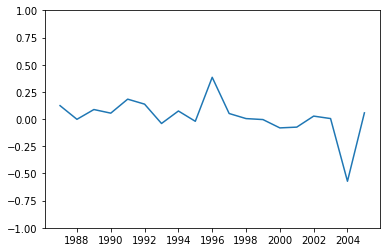

In [105]:
import statistics
import matplotlib.pyplot as plt
#for element in topic_1.iterrows():
#  print(element)
timedico={}
moyennes=[]
annees=[]
for element in set(select_topic['time']):
  timedico[element]=[]


for index,row in select_topic.iterrows():
  timedico[row['time']].append(row['compound'])

for value in timedico.values():
  moyennes.append(statistics.mean(value))
for key in timedico.keys():
  annees.append(key)

annees.sort()
plt.plot(annees,moyennes)
plt.gca().set_ylim([-1, 1])


In [49]:
fig = topic_model.visualize_topics(chosen_topics['ALL'])
fig

In [48]:
topic_model.visualize_heatmap(chosen_topics['ALL'])

In [74]:
topic_model.visualize_hierarchy()

## Topics over Time
Before we start with the Dynamic Topic Modeling step, it is important that you are satisfied with the topics that were created previously. We are going to be using those specific topics as a base for Dynamic Topic Modeling. 

Thus, this step will essentially show you how the topics that were defined previously have evolved over time. 

There are a few important parameters that you should take note of, namely:

* `docs`
  * These are the tweets that we are using
* `topics`
  * The topics that we have created before
* `timestamps`
  * The timestamp of each tweet/document
* `global_tuning`
  * Whether to average the topic representation of a topic at time *t* with its global topic representation
* `evolution_tuning`
  * Whether to average the topic representation of a topic at time *t* with the topic representation of that topic at time *t-1*
* `nr_bins`
  * The number of bins to put our timestamps into. It is computationally inefficient to extract the topics at thousands of different timestamps. Therefore, it is advised to keep this value below 20. 


In [50]:
topics_over_time = topic_model.topics_over_time(docs=texts, 
                                                topics=topics, 
                                                timestamps=timestamps, 
                                                global_tuning=True, 
                                                evolution_tuning=True, 
                                                nr_bins=20)

19it [03:17, 10.38s/it]


## Visualize Topics over Time
After having created our `topics_over_time`, we will have to visualize those topics as accessing them becomes a bit more difficult with the added temporal dimension. 

To do so, we are going to visualize the distribution of topics over time based on their frequency. Doing so allows us to see how the topics have evolved over time. Make sure to hover over any point to see how the topic representation at time *t* differs from the global topic representation. 


In [30]:
from pprint import pprint

wordlist = ['bias']
chosen_topics = set()
for row in freq.iterrows():
    curr_topic = topic_model.get_topic(row[0])
    try:
        words = [x[0] for x in curr_topic]
        if any(word in a_word for a_word in words for word in wordlist):
            chosen_topics.add(row[0])
    except:
        pass

for curr_topic in chosen_topics:
    print('Topic', topic)
    pprint(topic_model.get_topic(curr_topic))
    print()

print(chosen_topics)
topic_model.visualize_topics_over_time(topics_over_time[topics_over_time['Topic'].isin(chosen_topics)])

Topic False
[('debiasing', 0.08348879671250987),
 ('debiasing law', 0.050684839737500854),
 ('boundedly rational', 0.03474088531394424),
 ('boundedly', 0.03450105302393188),
 ('bounded rationality', 0.02586820447160461),
 ('bounded', 0.024561140082204676),
 ('rational', 0.02215914106658014),
 ('law', 0.02145762118245474),
 ('rationality', 0.021119536298380683),
 ('rational actors', 0.02101560852314043)]

Topic False
[('heuristics', 0.038563973527172224),
 ('heuristic', 0.03116627031443184),
 ('kahneman', 0.02964886277880214),
 ('biases', 0.025174668740409686),
 ('heuristics biases', 0.024769250100485737),
 ('tversky', 0.023062066819624118),
 ('availability', 0.022360047466457554),
 ('daniel kahneman', 0.020220246970710128),
 ('daniel', 0.01859640788820259),
 ('amos', 0.01718566565239425)]

{131, 54}


In [37]:
chosen_topics = {
    #'ALL': [2, 7, 9, 15, 17, 20, 21, 23, 26, 32, 33, 34, 38, 41, 48, 51, 52, 54, 55, 60, 61, 71, 80, 86, 106, 117, 126, 128, 131, 132, 142, 146, 152],
    'PHILO_POL': [55, 48, 60, 17, 20, 33, 152],
    'ECO_APPRO': [146, 23, 61], # approaches
    '34': [34],
    'INTER_JUR': [131, 32, 52], # theory of juridical interpretation
    'BEHAV_ECO': [54, 126, 132, 21, 142],
    'MISC': [128, 7, 38],
    'PATER': [80, 86], # nalism
    'PHILO_MOR': [106, 117, 41, 15, 2, 71], # moral
    'ENDOW': [51] #endowment
}

#topic_model.visualize_topics_over_time(topics_over_time[topics_over_time['Topic'].isin(chosen_topics['ALL'])])

In [67]:
chosen_topics = {
    'ALL': [36, 51, 40, 18, 75, 44, 130, 12, 24, 146, 28, 155, 33, 50, 47, 157, 92, 7, 81, 121, 19, 39, 13, 74, 125, 134, 55, 61, 3, 35, 65],
    'PHILO_POL': [36, 51, 40, 75, 44, 130],
    'ECO_APPRO': [24, 146],
    'ETH': [125, 134],
    'INTER_JUR': [19, 39, 155, 33, 50],
    'BEHAV_ECO': [47, 157, 92, 7, 81],
    'PATER': [13, 74],
    'PHILO_MOR': [3, 35, 18, 61, 121, 13, 74],
    'MISC': [55, 12],
    'ENDOW': [65]
}




In [68]:
all_topics = []
for values in chosen_topics['ALL']:
    all_topics.append(values)

from bertopic import plotting
plotting.visualize_hierarchy(topic_model, orientation="left", topics=all_topics, top_n_topics=None, width=1000, height=600)

[0.5947933320173857, 0.5170997345853553, 0.4813664706208664, 0.46961415140479074, 0.4695566375134459]


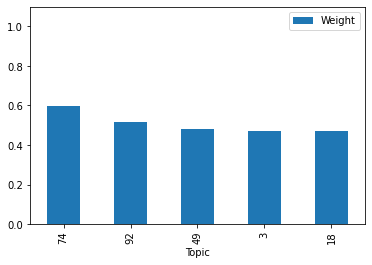

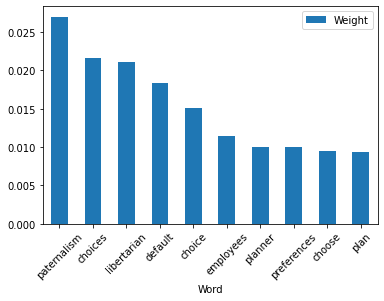

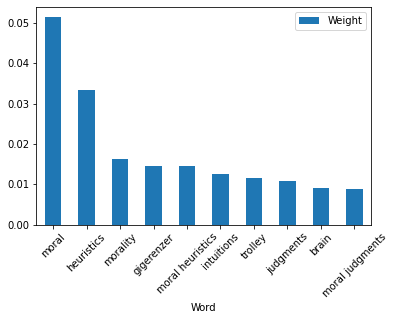

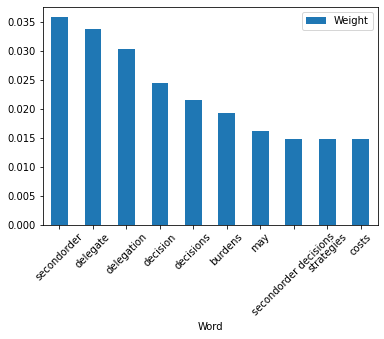

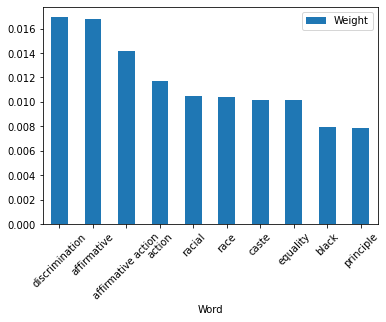

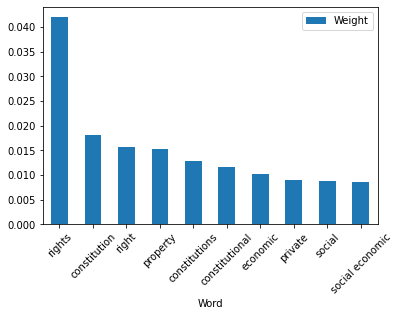

In [76]:
import pandas as pd

p_topics, probs = topic_model.find_topics('paternalism')
print(probs)
df = pd.DataFrame(zip(p_topics, probs), columns=['Topic', 'Weight'])
fig = df.plot.bar(x='Topic', y='Weight')
fig.set_ylim([0, 1.1])

for p_topic in p_topics:
    nodes = topic_model.get_topic(p_topic)
    words = [node[0] for node in nodes]
    weights = [node[1] for node in nodes]
    df = pd.DataFrame(zip(words, weights), columns=['Word', 'Weight'])
    fig = df.plot.bar(x='Word', y='Weight')
    fig.tick_params(axis='x', labelrotation=45)

In [52]:
topics_over_time[topics_over_time['Topic'] == chosen_topics['ENDOW'][0]]

Topic                                              Words  Frequency  \
34       51  reflections investment, 94 harv, eg clark, sta...          1   
271      51  cf nussbaum, compare endowment, sinden willing...          1   
363      51  endowment, entitlement, endowment effect, allo...          9   
454      51       507 51620, 21317, 51620 1984, 39 4347, 51620          1   
554      51  entitlement, endowment, allocation, theorem, i...         12   
667      51  gnp, positional goods, goods, entitlement, mar...          4   
784      51  richard thaler, thaler quasi, thaler, rational...          5   
914      51  initial, endowment, initial allocation, entitl...          4   
1023     51  entitlement, legal entitlement, theorem, endow...         11   
1132     51  entitlement, tokens, economics, endowment, the...         25   
1240     51  entitlement, endowment, allocation, initial, t...         19   
1375     51  endowment, endowment effect, entitlement, theo...         17   
1479     51  endowment, endowment effect, entitlement, init...         11   
1567     51  economics follow, follow additional, additiona...          1   
1647     51  endowment effect, endowment, goods initially, ...          4   
1733     51  muddled incoherent, muddled, incoherent, inclu...          2   

               Timestamp  
34   1986-12-25 10:12:00  
271  1989-09-13 06:00:00  
363  1990-08-08 00:00:00  
454  1991-07-02 18:00:00  
554  1992-05-26 12:00:00  
667  1993-04-20 06:00:00  
784  1994-03-15 00:00:00  
914  1995-02-06 18:00:00  
1023 1996-11-25 06:00:00  
1132 1997-10-20 00:00:00  
1240 1998-09-13 18:00:00  
1375 1999-08-08 12:00:00  
1479 2000-07-02 06:00:00  
1567 2001-05-27 00:00:00  
1647 2002-04-20 18:00:00  
1733 2003-03-15 12:00:00

In [58]:
chosen_topics.keys()

dict_keys(['ALL', 'PHILO_POL', 'ECO_APPRO', 'ETH', 'INTER_JUR', 'BEHAV_ECO', 'PATER', 'PHILO_MOR', 'MISC', 'ENDOW'])

In [71]:
topic_model.visualize_topics_over_time(topics_over_time[topics_over_time['Topic'].isin(chosen_topics['PATER'])])